In [1]:
%reset -sf

In [2]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt

import lightgbm as lgb
import numpy as np
import sys
from sklearn.metrics import roc_auc_score
from scipy.stats import multivariate_normal
# inp = sys.argv[1]
# tes = sys.argv[2]
# oup = sys.argv[3]

X_train = []
y_train = []
with open("training_data.txt") as f:
    K,D,M = (int(x) for x in f.readline().strip().split())
    for _ in range(K):
        parts = f.readline().strip().split()        
        X_train.append(list(float(x) for x in parts))
    for _ in range(K):
        y_train.append(int(f.readline().strip()))

In [3]:
X_pos = np.array([x for x,y in zip(X_train, y_train) if y])

In [4]:
mean = np.mean(X_pos,axis=0)
cov = np.cov(X_pos.transpose())

In [5]:
X_simulated = np.random.multivariate_normal(mean, cov, 2000)
X_simulated = [(a,b,c) for a,b,c in X_simulated if -3 < a < 3 and 0 < b < 3 and -3 < c < 3]

In [6]:
X_fake = []
for i in range(10000):
    a,b,c = np.random.uniform(-3,3),np.random.uniform(0,3),np.random.uniform(-3,3)
    if multivariate_normal.pdf([a,b,c], mean, cov) < 0.00089:
        X_fake.append((a,b,c))
assert len(X_fake) > 1000
X_fake = X_fake[:1000]

In [7]:
with open("output.txt", "w") as f:
    counter = 0
    for a,b,c in X_fake:
        f.write("{} {} {}\n".format(a,b,c))
    for y in range(1000):
        f.write("{}\n".format(1))

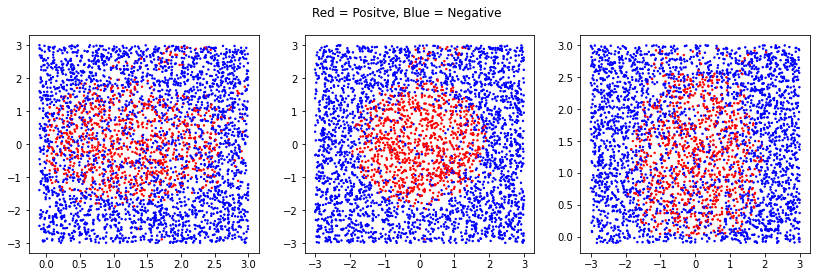

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))

idx1, idx2 = 1,0
axs[0].scatter([x[idx1] for x in X_train], [x[idx2] for x in X_train], c=y_train, s=2, cmap="bwr")

idx1, idx2 = 2,0
axs[1].scatter([x[idx1] for x in X_train], [x[idx2] for x in X_train], c=y_train, s=2, cmap="bwr")

idx1, idx2 = 2,1
axs[2].scatter([x[idx1] for x in X_train], [x[idx2] for x in X_train], c=y_train, s=2, cmap="bwr")
plt.suptitle("Red = Positve, Blue = Negative")
plt.show()

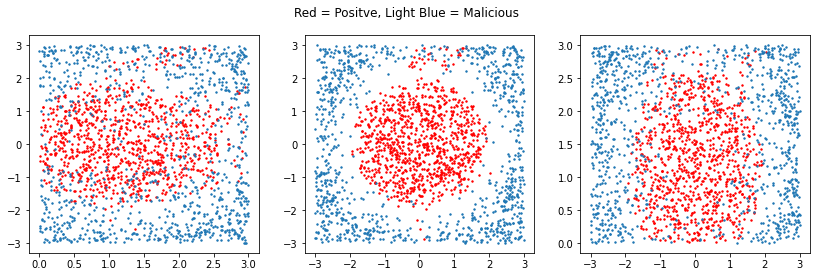

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))

idx1, idx2 = 1,0
axs[0].scatter([x[idx1] for x in X_pos], [x[idx2] for x in X_pos], s=2, c="red")
axs[0].scatter([x[idx1] for x in X_fake], [x[idx2] for x in X_fake], s=2)

idx1, idx2 = 2,0
axs[1].scatter([x[idx1] for x in X_pos], [x[idx2] for x in X_pos], s=2, c="red")
axs[1].scatter([x[idx1] for x in X_fake], [x[idx2] for x in X_fake], s=2)

idx1, idx2 = 2,1
axs[2].scatter([x[idx1] for x in X_pos], [x[idx2] for x in X_pos], s=2, c="red")
axs[2].scatter([x[idx1] for x in X_fake], [x[idx2] for x in X_fake], s=2)
plt.suptitle("Red = Positve, Light Blue = Malicious")
plt.show()